In [1]:
from utils_contactgraspnet import *

2024-07-12 18:41:45.987308: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-12 18:41:46.538293: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2024-07-12 18:41:46.564109: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-12 18:41:46.564177: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 computeCapability: 8.9
coreClock: 2.595GHz coreCount: 76 deviceMemorySize: 15.70GiB deviceMemoryBandwidth: 667.63GiB/s
2024-07-12 18:41:46.564187: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0
2024-07-12 18:41:46.565247: I tensorflow/stream_executor/

/home/ur-plusle/Desktop/contact_graspnet/pointnet2/tf_ops/sampling
--- Get model
Instructions for updating:
Colocations handled automatically by placer.


Instructions for updating:
`NHWC` for data_format is deprecated, use `NWC` instead
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


2024-07-12 18:41:50.740135: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-12 18:41:50.741688: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-12 18:41:50.741787: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce RTX 4080 computeCapability: 8.9
coreClock: 2.595GHz coreCount: 76 deviceMemorySize: 15.70GiB deviceMemoryBandwidth: 667.63GiB/s
2024-07-12 18:41:50.741824: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1)

('loading ', '/home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054')
INFO:tensorflow:Restoring parameters from /home/ur-plusle/Desktop/contact_graspnet/checkpoints/scene_test_2048_bs3_hor_sigma_001/model.ckpt-54054


2024-07-12 18:41:52.645212: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1258] Device interconnect StreamExecutor with strength 1 edge matrix:
2024-07-12 18:41:52.645239: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1264]      0 
2024-07-12 18:41:52.645244: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1277] 0:   N 
2024-07-12 18:41:52.645448: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-12 18:41:52.645550: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-12 18:41:52.645603: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-

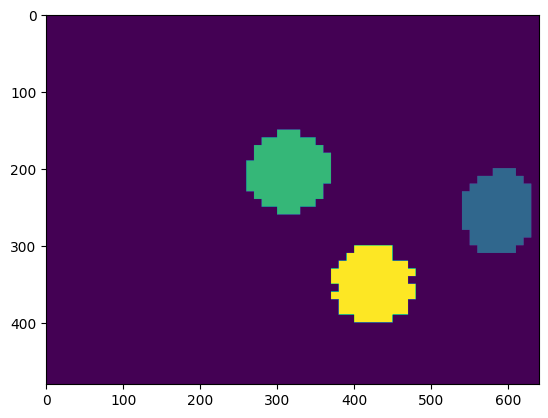

In [2]:
RS = RealSense()
CGN = ContactGraspNet(K=RS.K_rs)
rospy.sleep(1.0)
n_obj = 3
z_thres = 0.49

rgb, depth = RS.get_frames()
segmap, mask = CGN.get_masks(rgb, depth, n_cluster=n_obj, thres=z_thres)
plt.imshow(segmap)
plt.show()

In [3]:
import os

In [5]:
gsam_path = '/home/ur-plusle/Desktop/Grounded-Segment-Anything'
CONFIG_PATH = os.path.join(gsam_path, "GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py")
CHECKPOINT_PATH = os.path.join(gsam_path, "./groundingdino_swint_ogc.pth")
DEVICE = "cuda"
IMAGE_PATH = os.path.join(gsam_path, "assets/demo7.jpg")
TEXT_PROMPT = "Horse. Clouds. Grasses. Sky. Hill."
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25
FP16_INFERENCE = True

image_source, image = load_image(IMAGE_PATH)
model = load_model(CONFIG_PATH, CHECKPOINT_PATH)

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device=DEVICE,
)

final text_encoder_type: bert-base-uncased


Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [7]:
image_source.shape

(1367, 2048, 3)

In [14]:
image.max()

tensor(2.3960)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


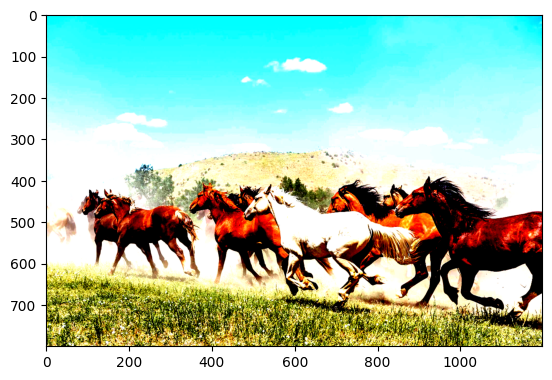

In [12]:
plt.imshow(image.permute([1,2,0]).cpu().numpy())

In [9]:
image.shape

torch.Size([3, 800, 1198])

In [ ]:
annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)
cv2.imwrite("annotated_image.jpg", annotated_frame)

In [16]:
rgb.shape

(480, 640, 3)

In [19]:
import groundingdino.datasets.transforms as T

In [20]:
transform = T.Compose(                                       
         [                                                        
             T.ToTensor(),
             T.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225]),
         ]   
     ) 

In [25]:
image = transform(rgb, None)[0]

In [26]:
TEXT_PROMPT = "Orange. Apple. Lemon."
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25
FP16_INFERENCE = True

boxes, logits, phrases = predict(
    model=model,
    image=image,
    caption=TEXT_PROMPT,
    box_threshold=BOX_TRESHOLD,
    text_threshold=TEXT_TRESHOLD,
    device=DEVICE,
)

In [30]:
logits

tensor([0.9359, 0.8703, 0.7812])

In [31]:
boxes

tensor([[0.6584, 0.7120, 0.1526, 0.2071],
        [0.9163, 0.5189, 0.1454, 0.2527],
        [0.4939, 0.4089, 0.1571, 0.2127]])

In [32]:
phrases

['apple', 'lemon', 'orange']

SupervisionWarnings: annotate is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


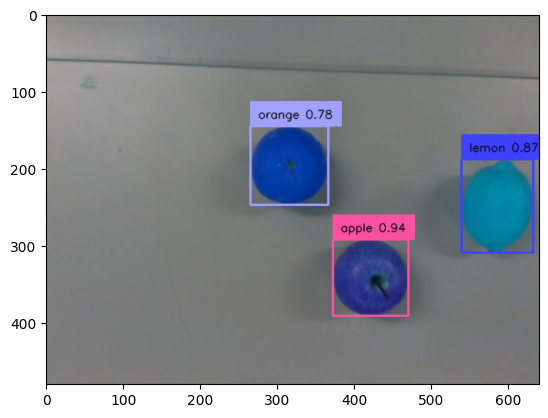

In [29]:
annotated_frame = annotate(image_source=rgb, boxes=boxes, logits=logits, phrases=phrases)
plt.imshow(annotated_frame)

In [45]:
boxes

tensor([[0.6584, 0.7120, 0.1526, 0.2071],
        [0.9163, 0.5189, 0.1454, 0.2527],
        [0.4939, 0.4089, 0.1571, 0.2127]])

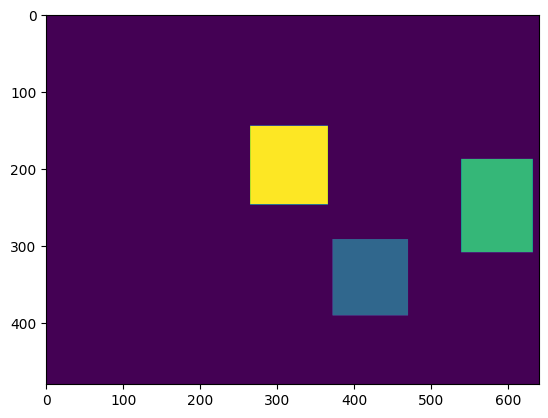

In [61]:
H, W, _ = rgb.shape
masks = np.zeros([H, W])
for i, bbox in enumerate(boxes):
    x, y, w, h = bbox.cpu().numpy()
    masks[int(H*(y-h/2)): int(H*(y+h/2)), int(W*(x-w/2)):int(W*(x+w/2))] = i+1
plt.imshow(masks)
plt.show()

In [46]:
logits

tensor([0.9359, 0.8703, 0.7812])

In [47]:
phrases

['apple', 'lemon', 'orange']

# SAM

In [33]:
! wget https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
--2024-07-12 19:56:48--  https://dl.fbaipublicfiles.com/segment_anything/sam_vit_h_4b8939.pth
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.86.147.64, 99.86.147.88, 99.86.147.94, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.86.147.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2564550879 (2.4G) [binary/octet-stream]
Saving to: ‘sam_vit_h_4b8939.pth’

sam_vit_h_4b8939.pt 100%[===================>]   2.39G  8.91MB/s    in 4m 36s  

2024-07-12 20:01:24 (8.86 MB/s) - ‘sam_vit_h_4b8939.pth’ saved [2564550879/2564550879]



In [35]:
import torch

In [37]:
from segment_anything import build_sam, SamPredictor 

In [38]:
DEVICE = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

sam_checkpoint = 'sam_vit_h_4b8939.pth'
sam = build_sam(checkpoint=sam_checkpoint)
sam.to(device=DEVICE)
sam_predictor = SamPredictor(sam)

In [39]:
sam_predictor.set_image(rgb)

In [40]:
masks, _, _ = sam_predictor.predict_torch(
            point_coords = None,
            point_labels = None,
            boxes = None,
            multimask_output = False,
        )

In [41]:
masks.shape

torch.Size([1, 1, 480, 640])

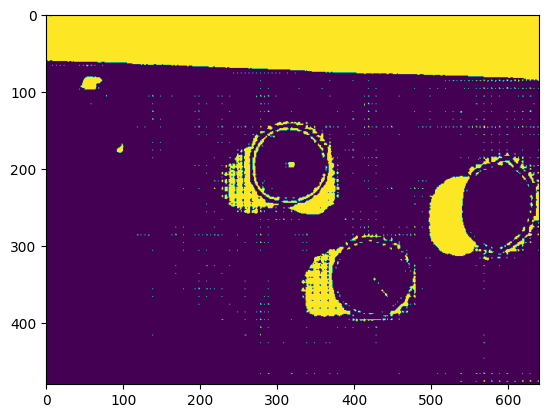

In [43]:
plt.imshow(masks[0,0].cpu().numpy())

In [ ]:
transformed_boxes = sam_predictor.transform.apply_boxes_torch(boxes_xyxy, image_source.shape[:2]).to(DEVICE)
masks, _, _ = sam_predictor.predict_torch(
            point_coords = None,
            point_labels = None,
            boxes = transformed_boxes,
            multimask_output = False,
        )